257 243
245 255


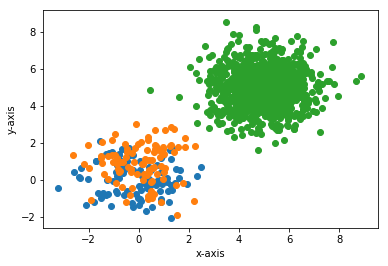

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Covariance of 2 random variables X and Y in jointly-distributed probability space P(X,Y)
# Cov(X,Y) = E_p(X,Y)[(X-E(X))(Y-E(Y))]
# The sign of co-variance is a measure of co-variability of the 2 random variables
#
# For example:-
# if the probability distribution has more occurances of X's above the mean, when the corresponding Y's are
# below the mean => X's and Y's do not change in the same way => covariance will be -ve
# The magnitude of co-variance can only be interpreted if the co-variance matrix is normalized.
# If normalized it indicates the strength of variability/opposite
#
# A vector of 2 random variables X & Y is called Random-Vector (X,Y)
# Covariance Matrix of a random-vector (X,Y) is given below
#         X          Y
#     ______________________
# X  | cov(X,X)  cov(X,Y)  |
#    |                     |
# Y  | cov(Y,X)  cov(Y,Y)  |
#    |_____________________|
#
# As cov(X,X) = var(X), cov(Y,Y) = var(Y) & cov(X,Y) = cov(Y,X),
# The covariance matrix simplifies to the below
#
#         X          Y
#     ______________________
# X  | var(X)      cov(X,Y)|
#    |                     |
# Y  | cov(X,Y)    var(Y)  |
#    |_____________________|
#
# Below are examples of how the distribution varies based on co-variance
# 2 dimensional data distribution
#
mean1 = np.array([0,0]) # Distribution centered on (0,0)

# co-variance matrix should be symmetric as explained above,
# let var(X) = var(Y) = 1; cov(X,Y) = 1
cov1 = [[1,0],
      [0,1]]

# The above implies:-
# 1) var(X) and var(Y) indicate howmuch X & Y vary about their mean of 0
# 2) covar(X,Y) indicate how Y changes according to X. Here it is 1 = > E[(X-0)(Y-0)] = 1
# For example it is not unreasonable to assume P(1,1) = 0.9 as we know var(X) = var(Y) = 1
# then E[X*Y]  = 0.9*(1*1) + 0.1(0.8*0.8) ~ 1
# Therefore X & Y vary strongly in the same way, this fact combined with the same means =>
# that X and Y have the same values in the distribution, so we should expect a straight line
# with +ve slope of 0.5

x = np.random.multivariate_normal(mean1, cov1, 100)
plt.scatter(x[:,0], x[:,1]) # blue plot


# Now if we change the mean of Y to 1 and retain the same covariance matrix,
mean2 = np.array([0,1])
cov2 = cov1
# the values of X & Y are not same anymore, but they should still vary in the same way i.e if X increases, Y
# should increase by the same amount. Hence the distribution should shift upwards(mean of X - 0, mean of Y - 1)
# This is indicated by the orange line. Observe that the slope remains 0.5

y = np.random.multivariate_normal(mean2, cov2, 100)
plt.scatter(y[:,0], y[:,1]) # orange plot

# Now lets fix the means for X & Y same (5,5), but change the co-variance to 0

mean3 = np.array([5,5])
cov3 = [[1,0],
       [0,1]]
# co-variance 0 implies that the no of Y's which vary with X = no of Y's which vary opposite of X
# This implies if we draw a horizantal & vertical lines through the mean (4,4):
# 1) The no of points right of vertical, above horizantal =~ no of points right of vertical, below horizantal
# 2) The no of points left of vertical, above horizontal =~ no of points left of vertical, below horizontal

z = np.random.multivariate_normal(mean3, cov3, 1000)
# lets count and see how many points are present in each quadrant
LL = []; LU = []; RL = []; RU = [];
for p in z:
    if p[0] < 5 and p[1] < 5:
        LL.append(p)
    if p[0] < 5 and p[1] > 5:
        LU.append(p)
    if p[0] > 5 and p[1] < 5:
        RL.append(p)
    if p[0] > 5 and p[1] > 5:
        RU.append(p)
# counts
print(len(LL), len(LU))
print(len(RL), len(RU))

plt.scatter(z[:,0], z[:,1]) # green plot

# Show the plot
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()


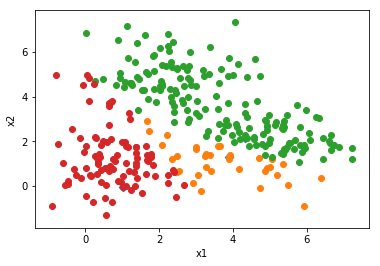

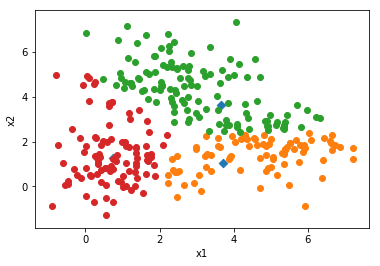

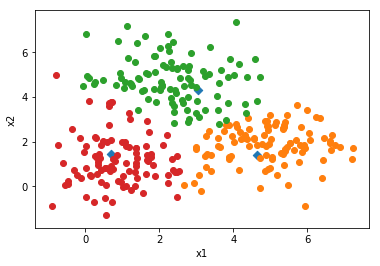

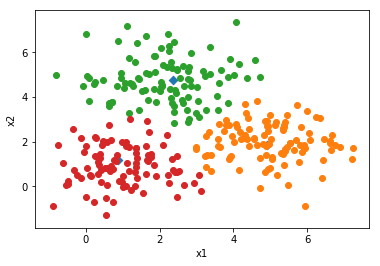

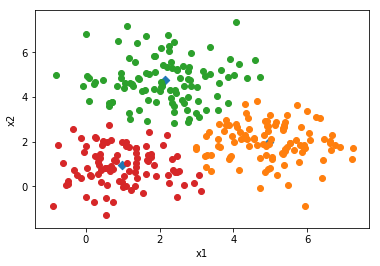

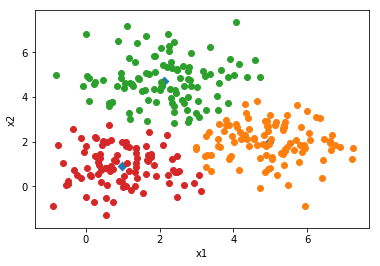

In [44]:
# K-means Algorithm for clustering
# Implementation from Bishop - Pattern Recognition & Machine Learning(9.1)
# Alex.G

from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Total no of samples
N = 300

# Total no of clusters
K = 3

# Assignment Matrix. Initially all elements are assigned to first cluster
r_nk = np.repeat([[1,0,0]],N,axis=0) # Repeats input Array elements along the specified axis :)

X, Y = make_blobs(n_samples=[N//3,N//3,N//3], n_features=2, centers=[[1,1],[2.5,5],[5,2]], cluster_std=1.0
                  , shuffle=True, random_state=None)

# EM algorithm for K-means
# Objective function for K-means: 
# J = sum(n = 1 to N)sum(k = 1 to K){r_nk||x_n - mean_cluster_k||^2}
# mininize J over all possible assignments of cluster_mean and r_nk. In other words we have to
# find K clusters such that, overall distances of x's in each of the clusters to the cluster-center(mean) is minimum
# We proceed to find min as below.
# Arbitrarily assign K initial cluster-centers
# 1) Sort the N data-items into K clusters based on their distances from each of the K cluster-centers
# 2) Calculate the new K cluster-centers as the centroids of each cluster
# 3) Repeat steps 1 & 2 until clusters are not changing anymore


D = np.shape(X)[1] # data dimension

#Max_dist = np.linalg.norm(X_max-X_min, ord=None, axis=None, keepdims=False)

# Initialize cluster-centers as random subset of K datapoints
mu_k_i = np.random.choice(np.shape(X)[0], K, replace=False)
mu_k = X[mu_k_i]

# Main loop of the algorithm
while(True):
    clusters = {i:[] for i in range(0,K)} # Initialize cluster-bins
    # plot cluster-centers
    plt.scatter(mu_k[:,0], mu_k[:,1], marker="D")
    for x in X:
        min_dist = -1
        for i,mu in enumerate(mu_k): # This is the 'M' step in the EM Algorithm
            dist = np.linalg.norm(x-mu, ord=None, axis=None, keepdims=False)
            if min_dist == -1:
                min_dist = dist
                cluster = i
            elif dist < min_dist:
                min_dist = dist
                cluster = i
        clusters[cluster].append(x)
    # plot clusters assignments
    for i in range(0,K):
        plt.scatter(np.array(clusters[i])[:,0], np.array(clusters[i])[:,1])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    
    # Re-calculate cluster-centers again. 
    mu_k_new = np.empty([K,D]) 
    for i in range(0,K):
        mu_k_new[i] = np.mean(np.array(clusters[i]), axis=0) # This is the 'E' step in the EM Algorithm
    if np.array_equal(mu_k, mu_k_new): # This means convergence of the algorithm
        break
    else:
        mu_k = mu_k_new 
        

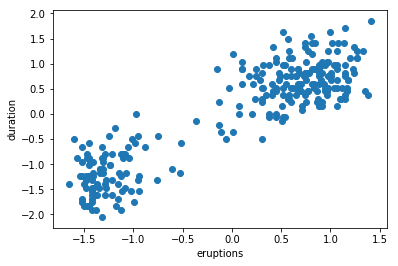

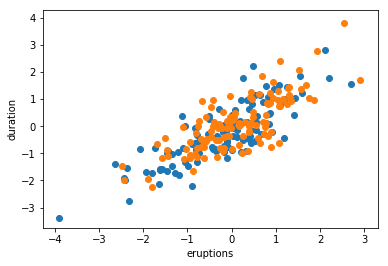

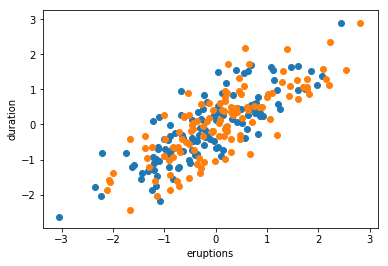

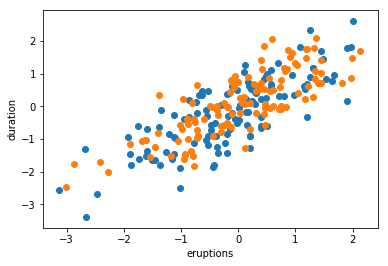

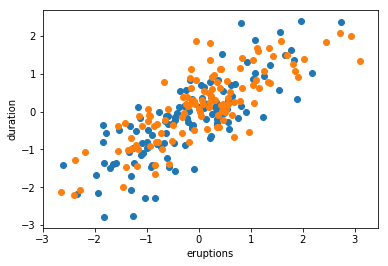

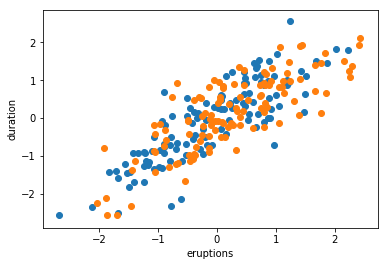

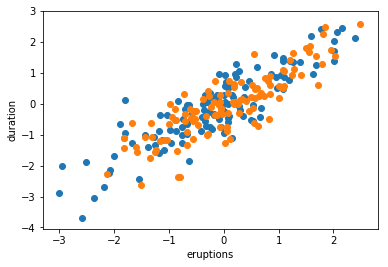

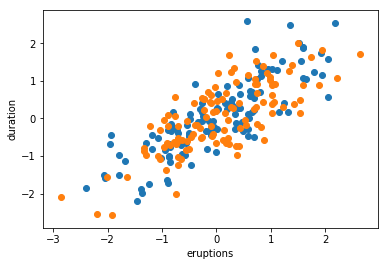

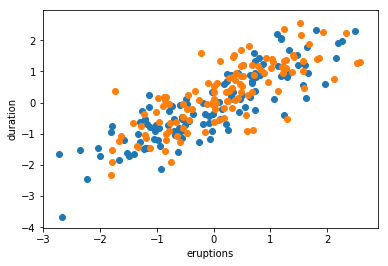

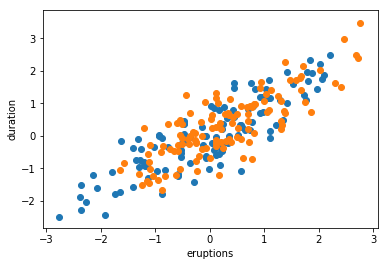

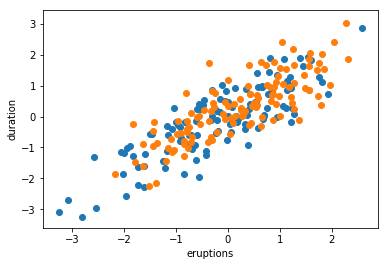

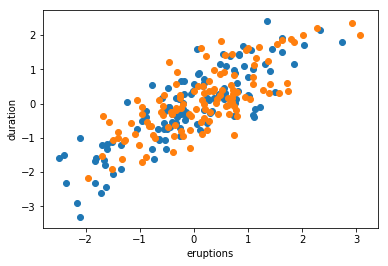

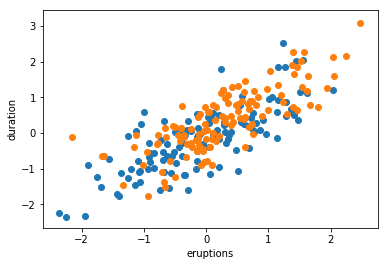

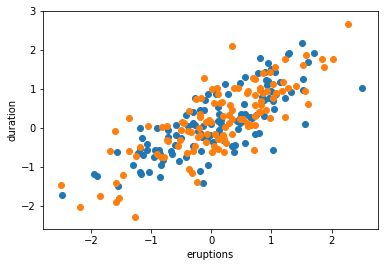

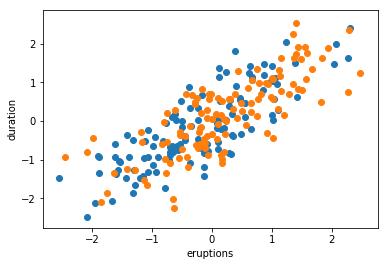

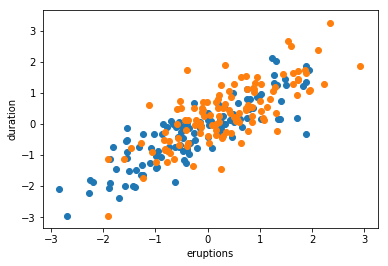

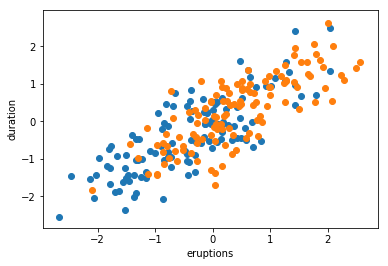

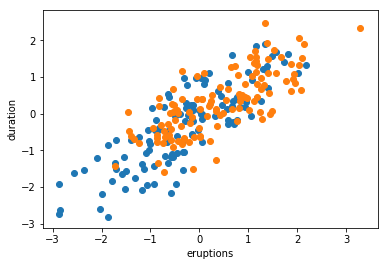

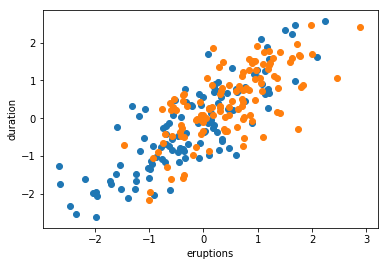

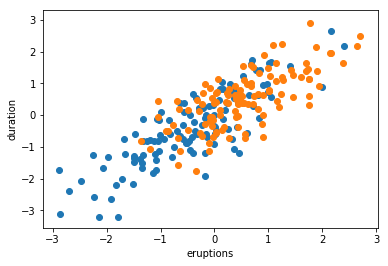

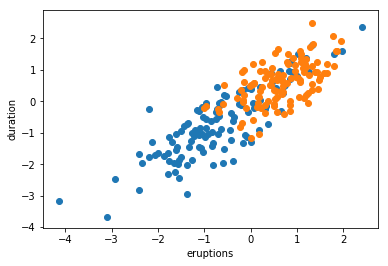

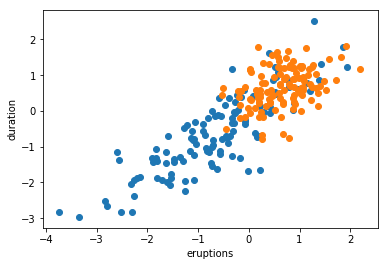

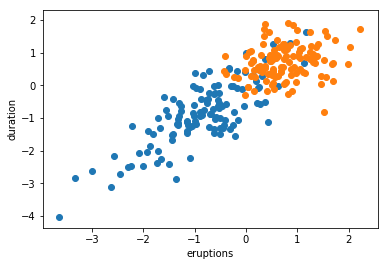

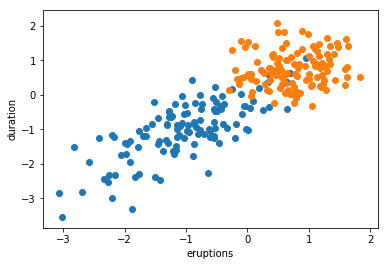

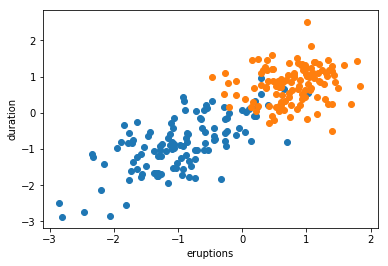

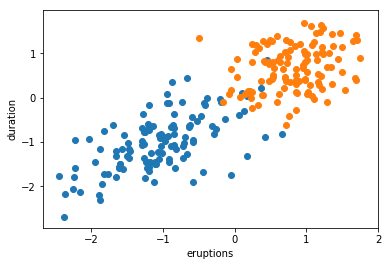

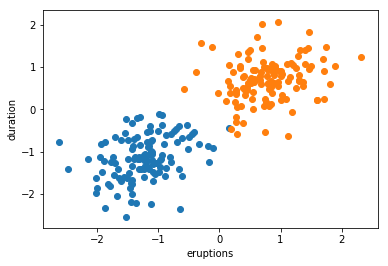

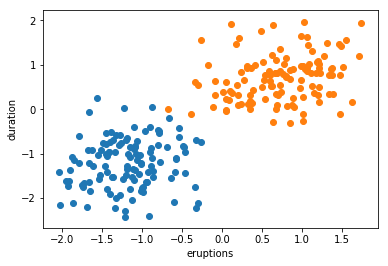

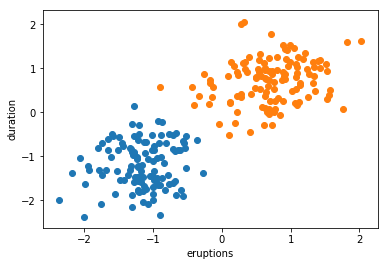

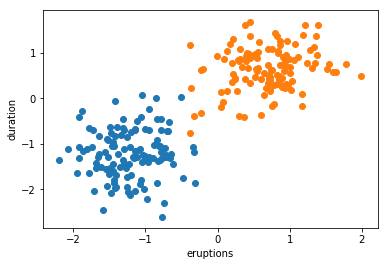

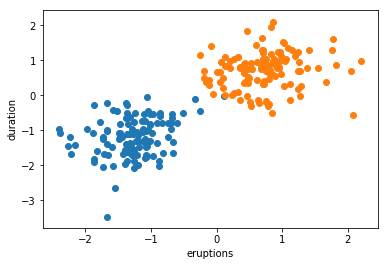

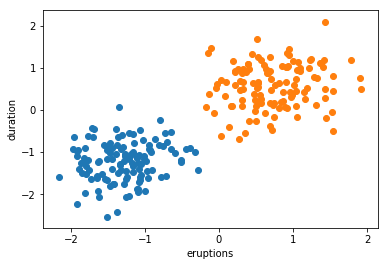

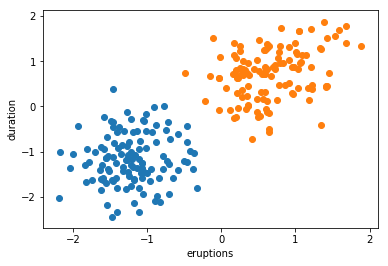

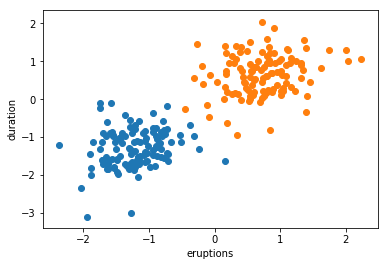

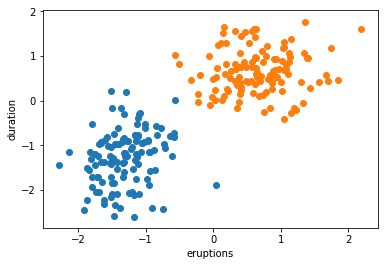

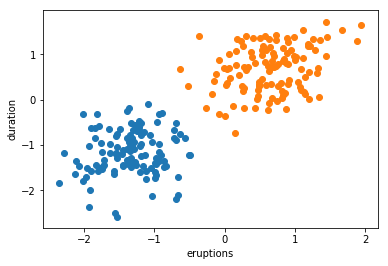

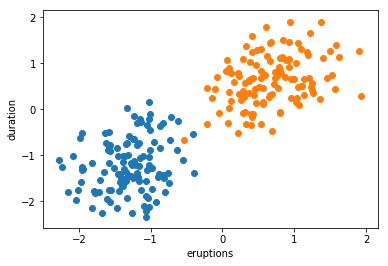

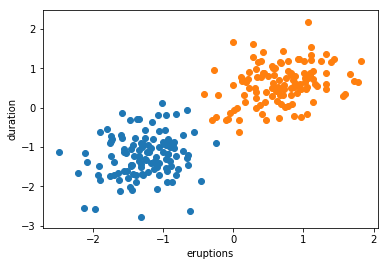

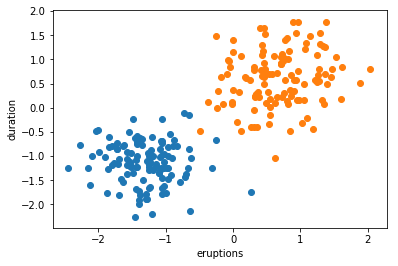

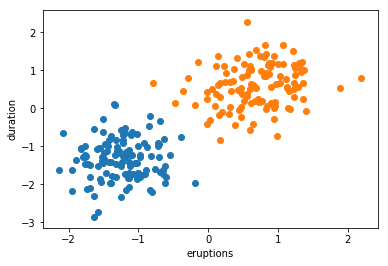

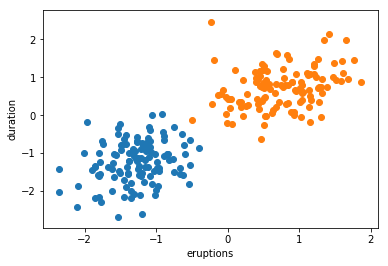

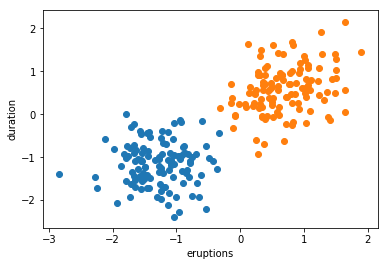

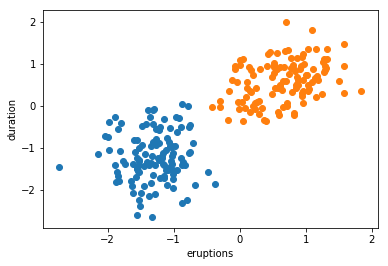

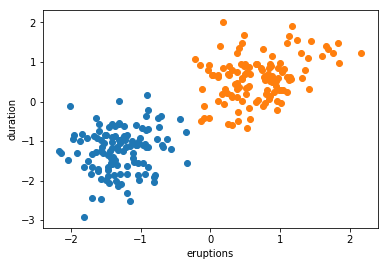

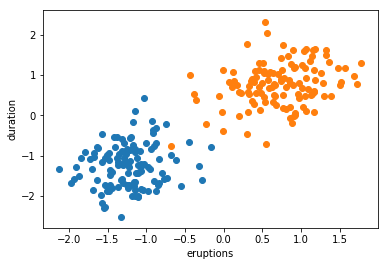

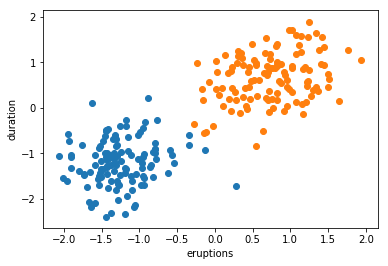

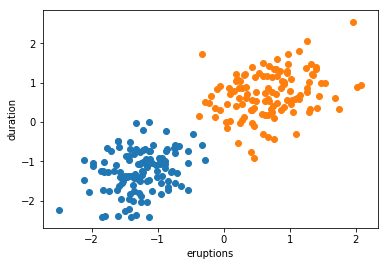

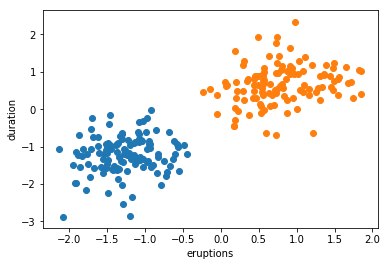

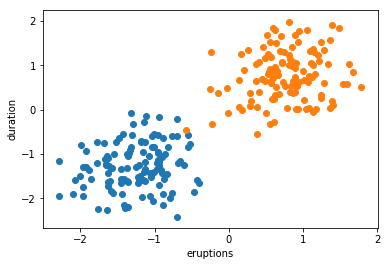

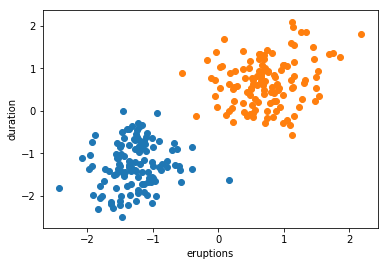

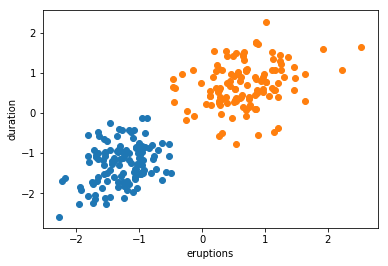

In [124]:
# EM Algorithm for Gaussian Mixture Modelling
# Implementation from Bishop - Pattern Recognition & Machine Learning(9.2.2)
# Alex.G
# 
from scipy.stats import multivariate_normal

# Dataset - oldfaithful
X = np.loadtxt('./old_faithful_data',delimiter=',')

# Normalize the data
mean1 = np.mean(X[:,0], axis=0)
mean2 = np.mean(X[:,1], axis=0)
std1 = np.std(X[:,0], axis=0)
std2 = np.std(X[:,1], axis=0)
X1_new = (X[:,0]-mean1)/std1
X2_new = (X[:,1]-mean2)/std2
X = np.concatenate((np.expand_dims(X1_new,axis=1), np.expand_dims(X2_new,axis=1)), axis=1)

# Show the data-set
plt.scatter(X[:,0], X[:,1])
plt.xlabel('eruptions')
plt.ylabel('duration')
plt.show()

# No of clusters
K = 2

# No and dim of datapoints
N, D = X.shape


# Initial values. For best results these should be assigned from K-means results
# gaussian-mixing ratios
pi_k = np.repeat([1/K],K, axis=0)

# gaussian-component means
mu_i = np.random.choice(N, K, replace=False)
mu_k = X[mu_i]

# gaussian-covariances
# we will have spherical variances by initalising to identity
sigma_sq = 1 # Hyperparameter
cov = np.eye(D)*sigma_sq
cov_k = np.repeat(np.expand_dims(cov, axis=0), K,  axis=0) # initialise K identical covariances

# E -step
# Use current params to get new responsibility matrix gamma_nk
count = 0

while(count < 50):
    gamma_nk = []
    for x in X:
        l=[]
        for (mu,cov,pi) in zip(mu_k,cov_k,pi_k):
            l.append(multivariate_normal.pdf(x, mean=mu, cov=cov)*pi)
        l = np.array(l)
        l = l/np.sum(l)
        gamma_nk.append(l)

    gamma_nk = np.array(gamma_nk)

    # M step                 
    # Update the params now

    # Calc N_k
    N_k = np.sum(gamma_nk, axis=0)

    # Update mu_k
    mu_k = np.matmul(X.T,gamma_nk).T
    for i,n_k in enumerate(N_k):
        mu_k[i] = mu_k[i]/n_k

    # Update cov_k using the new mu_k
    #for i,n_k in enumerate(N_k):
    #    sum = 0
    #    for j,x in enumerate(X):
    #        sum = sum + np.matmul((x-mu_k[i]),(x-mu_k[i]).T)*gamma_nk[j,i]
    #        print(sum)
    #    cov_k[i] = sum/n_k + np.eye(D)*0.5 #Add a small noise to make cov non-singular
    
    
    # Update cov_k using the new mu_k
    for i,n_k in enumerate(N_k):
        cov_k[i] = np.matmul(np.multiply((X-mu_k[i]),np.expand_dims(gamma_nk[:,i],axis=1)).T,X-mu_k[i])/n_k + np.eye(D)*0.1

    # Update pi_k
    pi_k = N_k/N
    count = count+1
    
    # Generate random samples
    cluster = {i:[] for i in range(0,K)}
    for k in range(0,K):
        cluster[i] = np.random.multivariate_normal(mu_k[k],cov_k[k],size=120)
        plt.scatter(cluster[i][:,0], cluster[i][:,1])
    plt.xlabel('eruptions')
    plt.ylabel('duration')
    plt.show()


In [54]:
np.repeat(np.expand_dims([[1,0],[0,1]],axis=0),2,axis=0)

array([[[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]]])

In [56]:
from scipy.stats import multivariate_normal
print(multivariate_normal.pdf([0.1,9], mean=[5,5], cov=[[2,0],[0,2]]))

3.6037908704488206e-06


In [57]:
np.sum([[1,2],[3,4]], axis=0)

array([4, 6])

In [64]:
list1 = ['a','b','c']
list2 = [1,2,3]
for (x,y) in zip(list1,list2):
    print(y)

1
2
3


13.617700017599958


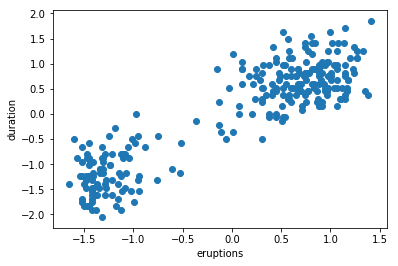

In [116]:
mean1 = np.mean(X[:,0], axis=0)
mean2 = np.mean(X[:,1], axis=0)
std1 = np.std(X[:,0], axis=0)
std2 = np.std(X[:,1], axis=0)
print(np.sqrt(np.dot(std,std)))
X1_new = (X[:,0]-mean1)/std1
X2_new = (X[:,1]-mean2)/std2
X_new = np.concatenate((np.expand_dims(X1_new,axis=1), np.expand_dims(X2_new,axis=1)), axis=1)
plt.scatter(X_new[:,0], X_new[:,1])
plt.xlabel('eruptions')
plt.ylabel('duration')
plt.show()